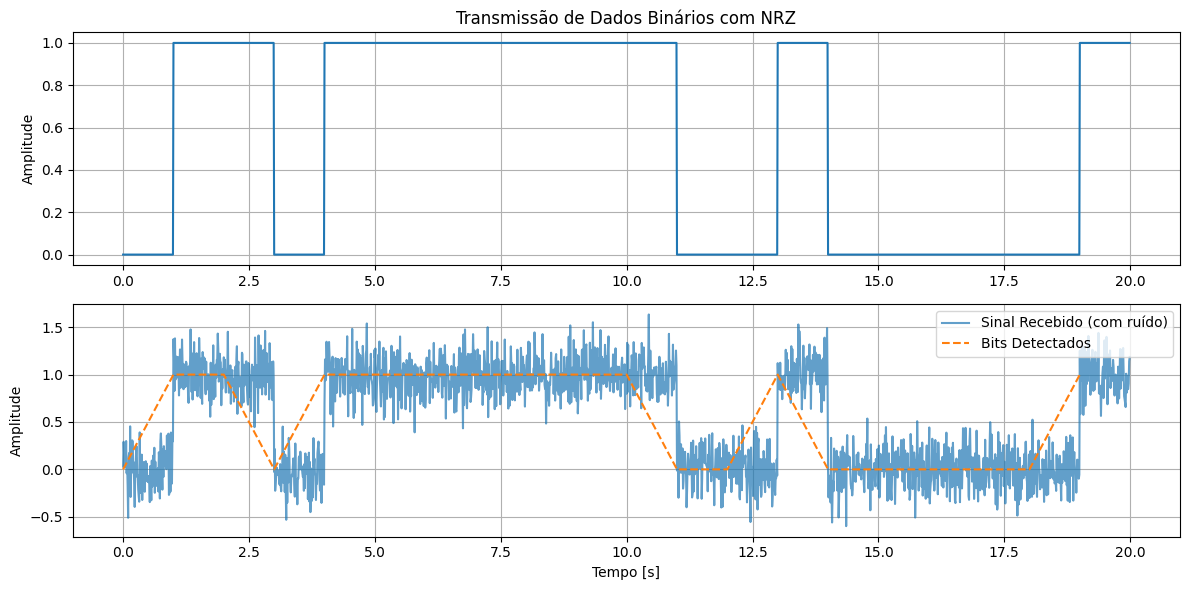

In [4]:
# Parte 6 – Simulação de Comunicação Digital com Modulação NRZ

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Geração de dados binários
np.random.seed(0)
bits = np.random.randint(0, 2, 20)

# Parâmetros de modulação
Tb = 1         # Duração de um bit
fs = 100       # Taxa de amostragem
samples_per_bit = fs
t = np.linspace(0, Tb * len(bits), samples_per_bit * len(bits), endpoint=False)

# Sinal NRZ (0 -> 0, 1 -> 1)
nrz = np.repeat(bits, samples_per_bit)

# Adição de ruído branco
noise = 0.2 * np.random.randn(len(nrz))
received = nrz + noise

# Detecção simples com limiar
detected_bits = (received.reshape(-1, samples_per_bit).mean(axis=1) > 0.5).astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, nrz, label='Sinal Transmitido (NRZ)')
plt.title("Transmissão de Dados Binários com NRZ")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, received, label='Sinal Recebido (com ruído)', alpha=0.7)
plt.plot(np.repeat(np.arange(len(detected_bits)), samples_per_bit), np.repeat(detected_bits, samples_per_bit), '--', label='Bits Detectados')
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


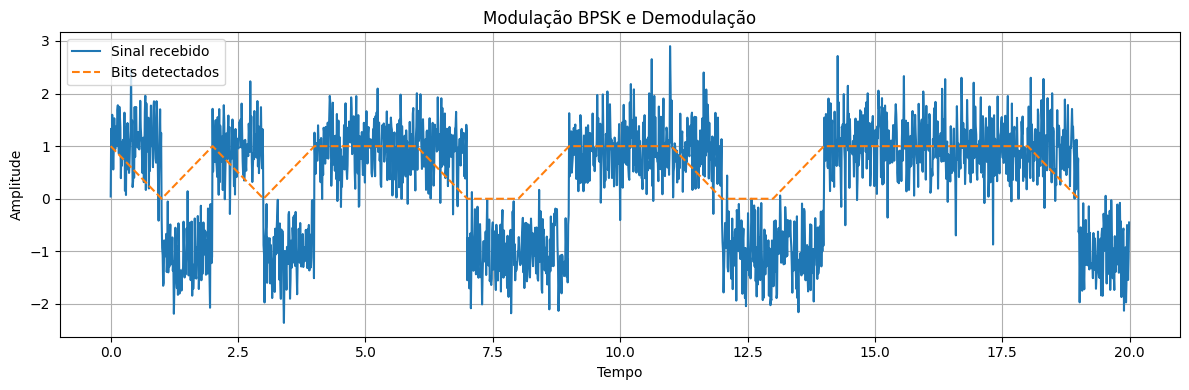

In [5]:
#Sinal BPSK modulado e demodulado
# Dados binários
bits = np.random.randint(0, 2, 20)

# Modulação BPSK: 0 → -1, 1 → +1
bpsk = 2*bits - 1
samples_per_bit = 100
t = np.linspace(0, len(bits), samples_per_bit * len(bits), endpoint=False)
bpsk_signal = np.repeat(bpsk, samples_per_bit)

# Canal com ruído
rx = bpsk_signal + 0.5 * np.random.randn(len(bpsk_signal))

# Demodulação por limiar
detected = (rx.reshape(-1, samples_per_bit).mean(axis=1) > 0).astype(int)

# Comparação
plt.figure(figsize=(12, 4))
plt.plot(t, rx, label="Sinal recebido")
plt.plot(np.repeat(np.arange(len(detected)), samples_per_bit), np.repeat(detected, samples_per_bit), '--', label="Bits detectados")
plt.title("Modulação BPSK e Demodulação")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()